# Using `arcadia-pycolor` to make figures in Python

`arcadia-pycolor` is a Python package that provides a set of color palettes and convenience functions to style plots so that they are compatible with Arcadia's style guide. This notebook provides a quick introduction to `arcadia_pycolor` and how to use it to style `matplotlib` and `seaborn` plots so that they comply with the Arcadia style guide, largely following the [Quickstart Guide](https://github.com/Arcadia-Science/arcadia-pycolor/blob/main/docs/quickstart.md).

We'll cover the following topics:

1. Installing `arcadia-pycolor`
2. Configuring `matplotlib` defaults
3. Accessing and using colors, palettes, and gradients
4. Using `arcadia-pycolor` to style plots


## 1. Install the `arcadia-pycolor` package

We've designed `arcadia-pycolor` as a Python package that is distributed via PyPI. This means it can be installed using `pip` just like any other Python package. In a virtual environment of your choice, run the following command in your terminal:

```bash
pip install arcadia-pycolor
```

### Requirements
`arcadia-pycolor` requires Python >=3.9 and has the following dependencies (which are detected and installed automatically when you install `arcadia-pycolor` using `pip`):
- `matplotlib` (version 3.7 and above, except version 3.8.0)
- `colorspacious` (version 1.1.2 and above)

Additionally, `arcadia-pycolor` checks whether you have the **"Suisse Int'l"** family of fonts installed on your system. If these fonts aren't installed, `arcadia-pycolor` will default to **"Arial"**. To download the "Suisse Int'l" font family, check out the Brand Assets page in Notion.

The package can then be imported in notebooks or scripts using the following command:

In [1]:
import arcadia_pycolor as apc

## 2. Set the default `matplotlib` styles

The package provides a function called `apc.mpl.setup` that sets the default `matplotlib` styles to match the Arcadia style guide. This function only needs to be called once, ideally at the beginning of the notebook or script. The styles it sets will automatically apply to all plots in the notebook or script.

### What does `apc.mpl.setup` do?
- Sets the default font to **"Suisse Int'l"** (or **"Arial"** if not installed).
- Changes default axis, axis label, legend, and color cycler styles to match the Arcadia style.
- Registers Arcadia's colors, palettes, and gradients with `matplotlib`.

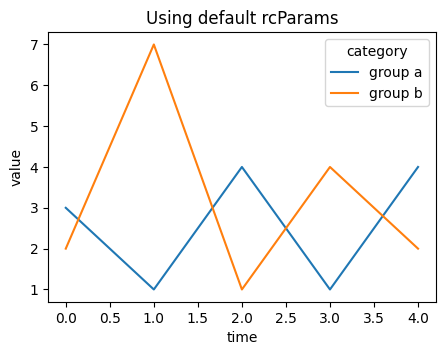

Fontconfig warning: ignoring UTF-8: not a valid region tag


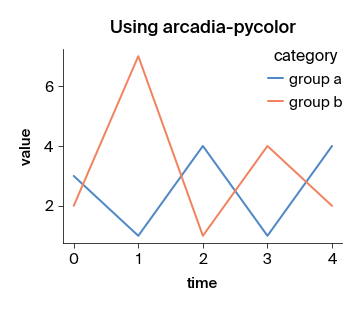

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt


def example_plot(title: str = "Example plot"):
    plt.figure(figsize = (5, 3.5))
    plt.plot([3, 1, 4, 1, 4], label = "group a")
    plt.plot([2, 7, 1, 4, 2], label = "group b")

    plt.xlabel("time")
    plt.ylabel("value")

    plt.legend(title = "category")
    plt.title(title)

# Plot using default rcParams
example_plot("Using default rcParams")
plt.show()


# Plot using apc.mpl.setup()
apc.mpl.setup()

example_plot("Using arcadia-pycolor")
plt.show()

Some aspects of the style guide can only be applied to individual plots. The `apc.mpl.style_plot` function can be used to apply these styles to a single plot. This function takes a Matplotlib `Axes` object as input.

If an `Axes` object is not passed to `style_plot`, the function will style the current plot (internally, `style_plot` uses `plt.gca()` to get the "current" `Axes` object).

By default, the `style_plot` function capitalizes the x- and y-axis labels and styles the legend, if one exists. In addition, it has a few optional arguments that can be used to customize the styling of the x- and y-axis tick labels:

- `monospaced_axes` sets the tick labels of the x- and/or y-axis to a monospaced font.
- `categorical_axes` adjusts the x- and/or y-axis styles to be more readable when the axis represents a categorical variable.
- `colorbar_exists` tells the function to style the colorbar, if one exists.

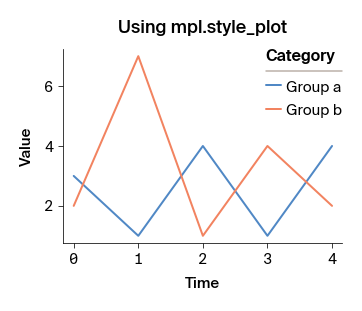

In [3]:
example_plot("Using mpl.style_plot")
apc.mpl.style_plot(monospaced_axes="both")
plt.show()

## 3. Using Arcadia colors

The Arcadia style guide defines sets of colors called "color palettes" that should be used in all figures. The `arcadia_pycolor` package provides easy access to both individual colors and to pre-defined palettes and gradients.

Within `arcadia-pycolor`, all of Arcadia's named colors are available as variables. For example, you can access and preview the color `aegean` as follows. When the cell is evaluated, it will output the name and hex code of the color alongside a swatch showing what the color looks like:

In [4]:
apc.aegean

   aegean #5088C5

You can pass colors directly to `matplotlib` functions to style plots. 

Named colors are also registered to `matplotlib` using the prefix `"apc:"`. For example, `"apc:aegean"` is a valid color argument for `matplotlib` functions.

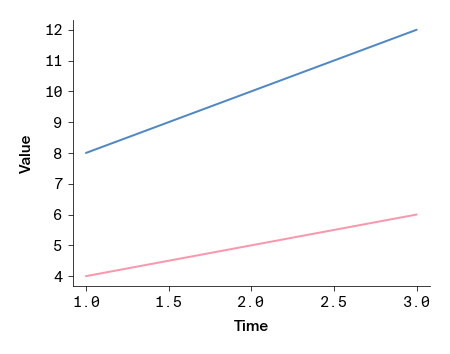

In [5]:
import matplotlib.pyplot as plt
import arcadia_pycolor as apc

plt.plot([1, 2, 3], [4, 5, 6], color=apc.rose)
plt.plot([1, 2, 3], [8, 10, 12], color="apc:aegean")

plt.xlabel("time")
plt.ylabel("value")

apc.mpl.style_plot(monospaced_axes = "both")

plt.show()

### Using color palettes
Individual colors are organized into groups called "palettes." The palettes themselves have names and are accessible as attributes of the `apc.palettes` module. For example, we can rewrite the previous example to use the first two colors in the "primary" palette:

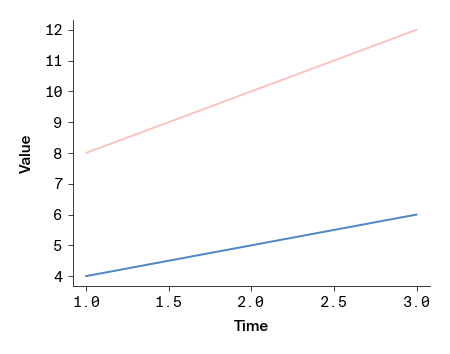

In [6]:
plt.plot([1, 2, 3], [4, 5, 6], color=apc.palettes.primary.colors[0])
plt.plot([1, 2, 3], [8, 10, 12], color=apc.palettes.secondary.colors[1])

plt.xlabel("time")
plt.ylabel("value")
apc.mpl.style_plot(monospaced_axes="both")

plt.show()

To see all of the colors in a palette, evaluate the palette object in a notebook cell. This outputs a list of color swatches with the names and hex codes of the colors in the palette:

In [7]:
apc.palettes.primary

                        
   aegean    #5088C5
   amber     #F28360
   seaweed   #3B9886
   canary    #F7B846
   aster     #7A77AB
   rose      #F898AE
   vital     #73B5E3
   tangerine #FFB984
   lime      #97CD78
   dragon    #C85152
   oat       #F5E4BE
   wish      #BABEE0

### Using color gradients
The Arcadia style guide also defines continuous color gradients that can be used in plots like heatmaps. These gradients are accessible as attributes of the `apc.gradients` module. To use a gradient in a `matplotlib` or `seaborn` plot, you can convert it to a `matplotlib` colormap using the `to_mpl_cmap` method. For example, to use the "blues" gradient in a heatmap:

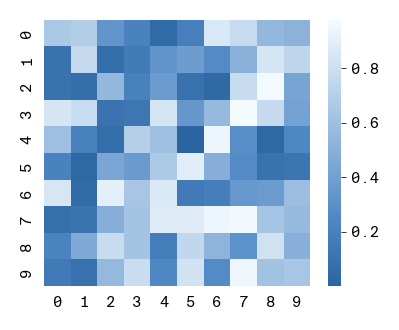

In [8]:
import numpy as np
import seaborn as sns

data = np.random.rand(10, 10)
sns.heatmap(data, square = True, cmap=apc.gradients.blues.to_mpl_cmap())

apc.mpl.style_plot(categorical_axes="both", monospaced_axes="both", colorbar_exists=True)
plt.show()

Gradients are also registered to `matplotlib` using the prefix `"apc:"`. For example, `"apc:reds"` is a valid colormap argument for `matplotlib` or `seaborn` functions:

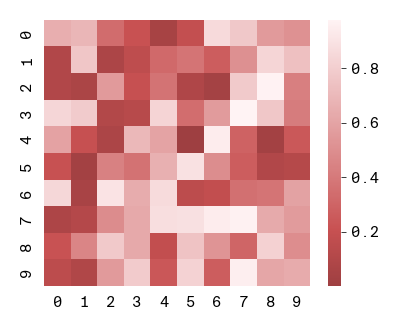

In [9]:
sns.heatmap(data, square = True, cmap="apc:reds")

apc.mpl.style_plot(categorical_axes="both", monospaced_axes="both", colorbar_exists=True)
plt.show()

Just like palettes, gradients can be visualized by evaluating a gradient object in a Jupyter notebook cell. This outputs a gradient swatch showing the colors in the gradient.

In [10]:
apc.gradients.viridis

                     
   space  #282A49 0
   aegean #5088C5 0.468
   lime   #97CD78 0.746
   butter #FFFDBD 1

## 4. More resources

You can find more resources and examples in the [arcadia-pycolor documentation](https://github.com/Arcadia-Science/arcadia-pycolor/tree/main/docs).